# Homework 2

**Dataset description:**
- orders.parquet: An order history of customers. Each row is an order and the item_ids for the order are stored as a list in the item_ids column
- regulars.parquet: Users are allowed to specify items that they wish to buy regularly. This data gives the items each user has asked to get regularly, along with when they input that information.
- abandoned_cart.parquet: If a user has added items to their basket but not
bought them, we capture that information. Items that were abandoned are stored
as a list in item_ids.
- inventory.parquet: Some information about each item_id
- users.parquet: Information about users.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_orders = pd.read_parquet('/Users/alvaroleal/Desktop/DS/Zrive/orders.parquet')
df_regulars = pd.read_parquet('/Users/alvaroleal/Desktop/DS/Zrive/regulars.parquet')
df_abandoned_carts = pd.read_parquet('/Users/alvaroleal/Desktop/DS/Zrive/abandoned_carts.parquet')
df_inventory = pd.read_parquet('/Users/alvaroleal/Desktop/DS/Zrive/inventory.parquet')
df_users = pd.read_parquet('/Users/alvaroleal/Desktop/DS/Zrive/users.parquet')
df_feature_frame = pd.read_csv('/Users/alvaroleal/Desktop/DS/Zrive/feature_frame.csv')

# 1. Understanding the problem space
Para ello, vamos a definir una fun función que rapidamente haga todos los quick checks con cada uno de los datasets.

In [32]:
def quick_view(df):
    print('Primeras filas:')
    print(df.head())
    print('\n')

    print('Información general:')
    df.info()
    print('\n')

    print('Número de valores null:')
    print(df.isnull().sum())
    print('\n')

    print('Porcentaje de valores null:')
    print(df.isnull().mean() * 100)
    print('\n')

In [5]:
quick_view(df_orders)

Primeras filas:
               id                                            user_id  \
10  2204073066628  62e271062eb827e411bd73941178d29b022f5f2de9d37f...   
20  2204707520644  bf591c887c46d5d3513142b6a855dd7ffb9cc00697f6f5...   
21  2204838822020  329f08c66abb51f8c0b8a9526670da2d94c0c6eef06700...   
34  2208967852164  f6451fce7b1c58d0effbe37fcb4e67b718193562766470...   
49  2215889436804  68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...   

            created_at order_date  user_order_seq  \
10 2020-04-30 14:32:19 2020-04-30               1   
20 2020-04-30 17:39:00 2020-04-30               1   
21 2020-04-30 18:12:30 2020-04-30               1   
34 2020-05-01 19:44:11 2020-05-01               1   
49 2020-05-03 21:56:14 2020-05-03               1   

                                        ordered_items  
10  [33618849693828, 33618860179588, 3361887404045...  
20  [33618835243140, 33618835964036, 3361886244058...  
21  [33618891145348, 33618893570180, 3361889766618...  
34  [336

Vemos que no hay valores nulos y que parece que trabjamos con una muestra de un dataset mayor: 8773 entries, 10 to 64538. Todo parece OK aunque no sé bien como hacer el match entre ordered_items y el variant_id de los otros datasets. Se me ocurre hacer otra columna con el espacio temportal entre created_at y order_date para obtener aún mas datos significativos como que productos generan mas dudas al consumidor, compras impulsivas tipos de consumidores, etc...

In [6]:
quick_view(df_regulars)

Primeras filas:
                                              user_id      variant_id  \
3   68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...  33618848088196   
11  aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...  33667178659972   
18  68e872ff888303bff58ec56a3a986f77ddebdbe5c279e7...  33619009208452   
46  aed88fc0b004270a62ff1fe4b94141f6b1db1496dbb0c0...  33667305373828   
47  4594e99557113d5a1c5b59bf31b8704aafe5c7bd180b32...  33667247341700   

            created_at  
3  2020-04-30 15:07:03  
11 2020-05-05 23:34:35  
18 2020-04-30 15:07:03  
46 2020-05-05 23:34:35  
47 2020-05-06 14:42:11  


Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 18105 entries, 3 to 37720
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     18105 non-null  object        
 1   variant_id  18105 non-null  int64         
 2   created_at  18105 non-null  datetime64[us]
dtypes: datetime64[us](1), in

Todo parece OK, genial para generar sistemas de recomendaciones.

In [7]:
quick_view(df_abandoned_carts)

Primeras filas:
                id                                            user_id  \
0   12858560217220  5c4e5953f13ddc3bc9659a3453356155e5efe4739d7a2b...   
13  20352449839236  9d6187545c005d39e44d0456d87790db18611d7c7379bd...   
45  20478401413252  e83fb0273d70c37a2968fee107113698fd4f389c442c0b...   
50  20481783103620  10c42e10e530284b7c7c50f3a23a98726d5747b8128084...   
52  20485321687172  d9989439524b3f6fc4f41686d043f315fb408b954d6153...   

            created_at                                         variant_id  
0  2020-05-20 13:53:24  [33826459287684, 33826457616516, 3366719212762...  
13 2021-06-27 05:24:13  [34415988179076, 34037940158596, 3450282236326...  
45 2021-07-18 08:23:49  [34543001337988, 34037939372164, 3411360609088...  
50 2021-07-18 21:29:36  [33667268116612, 34037940224132, 3443605520397...  
52 2021-07-19 12:17:05   [33667268083844, 34284950454404, 33973246886020]  


Información general:
<class 'pandas.core.frame.DataFrame'>
Index: 5457 entries, 0 to 70

Todo parece OK en primeras.

In [8]:
quick_view(df_inventory)

Primeras filas:
       variant_id  price  compare_at_price          vendor  \
0  39587297165444   3.09              3.15           heinz   
1  34370361229444   4.99              5.50   whogivesacrap   
2  34284951863428   3.69              3.99          plenty   
3  33667283583108   1.79              1.99  thecheekypanda   
4  33803537973380   1.99              2.09         colgate   

                      product_type                                        tags  
0             condiments-dressings                       [table-sauces, vegan]  
1  toilet-roll-kitchen-roll-tissue                 [b-corp, eco, toilet-rolls]  
2  toilet-roll-kitchen-roll-tissue                              [kitchen-roll]  
3  toilet-roll-kitchen-roll-tissue  [b-corp, cruelty-free, eco, tissue, vegan]  
4                           dental                        [dental-accessories]  


Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1733 entries, 0 to 1732
Data columns (total 6 column

No entiendo bien que puede significar 'compare_at_price', quizás el margen que le sacan al producto.

In [9]:
quick_view(df_users)

Primeras filas:
                                                user_id user_segment  \
2160  0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...       Top Up   
1123  15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...       Top Up   
1958  33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...       Top Up   
675   57ca7591dc79825df0cecc4836a58e6062454555c86c35...       Top Up   
4694  085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...       Top Up   

     user_nuts1     first_ordered_at customer_cohort_month  count_people  \
2160        UKH  2021-05-08 13:33:49   2021-05-01 00:00:00           NaN   
1123        UKJ  2021-11-17 16:30:20   2021-11-01 00:00:00           NaN   
1958        UKD  2022-03-09 23:12:25   2022-03-01 00:00:00           NaN   
675         UKI  2021-04-23 16:29:02   2021-04-01 00:00:00           NaN   
4694        UKJ  2021-11-02 13:50:06   2021-11-01 00:00:00           NaN   

      count_adults  count_children  count_babies  count_pets  
2160           NaN             

In [10]:
df_users.groupby('user_segment').count()

,user_id,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets
user_segment,,,,,,,,,
Proposition,2340,2315,2340,2340,193,193,193,193,193
Top Up,2643,2617,2643,2643,132,132,132,132,132


Más del 93% de los datos en 5 categorias son Null, parece que se dejaron de pedir por algun motivo (quizas temas de privacidad) o que se han pedido de manera opcional y pocos usuarios los proporcionan.

# First Analysis conducted - Popularidad de producto
En este análsis vamos a ver que productos son los más populares en función a las veces que estos son añadidos como 'wise to buy regularly'.

In [11]:
df_variant_user_counts = df_regulars.groupby('variant_id')['user_id'].nunique().reset_index()
df_variant_user_counts.rename(columns={'user_id': 'user_id_count'}, inplace=True)
df_inventory_merged = pd.merge(df_inventory, df_variant_user_counts, how='left', on='variant_id')

In [12]:
print(df_inventory_merged.isnull().sum())

variant_id            0
price                 0
compare_at_price      0
vendor                0
product_type          0
tags                  0
user_id_count       448
dtype: int64


Parece que hay una serie de varianted el dataframe de inventory las cuales no estaban en el dataframe de regulars. Vamos a comprobarlo rapidamente para ver que estamos haciendo todo bien:

In [13]:
print(f'Valores únicos de inventory: {len(df_inventory['variant_id'].unique())}')
print(f'Valores únicos de regulars: {len(df_regulars['variant_id'].unique())}')

Valores únicos de inventory: 1733
Valores únicos de regulars: 1843


In [14]:
unicos_inventory = df_inventory['variant_id'].unique()
unicos_regulars = df_regulars['variant_id'].unique()
valores_coincidentes = np.intersect1d(unicos_inventory, unicos_regulars)

print(f'Valores únicos coincidentes entre inventory y regulars: {len(unicos_inventory) - len(valores_coincidentes)}')

Valores únicos coincidentes entre inventory y regulars: 448


**Estudio de la popularidad por marca:**

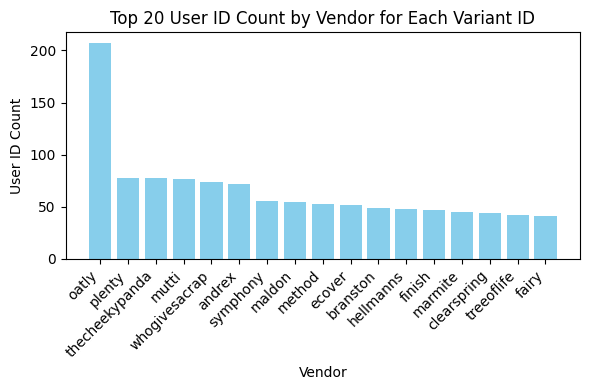

In [15]:
df_inventory_merged['user_id_count'] = df_inventory_merged['user_id_count'].fillna(0).astype(int)

df_inventory_merged_sorted = df_inventory_merged.sort_values(by='user_id_count', ascending=False)

plt.figure(figsize=(6, 4))
plt.bar(df_inventory_merged_sorted['vendor'].head(20), df_inventory_merged_sorted['user_id_count'].head(20), color='skyblue')
plt.xlabel('Vendor')
plt.ylabel('User ID Count')
plt.title('Top 20 User ID Count by Vendor for Each Variant ID')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

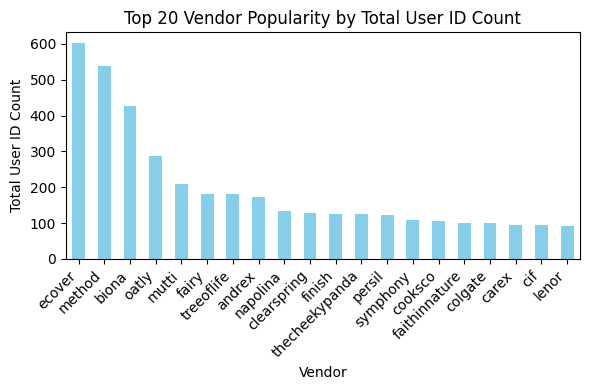

In [16]:
df_vendor_popularity = df_inventory_merged_sorted.groupby('vendor')['user_id_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(6, 4))
df_vendor_popularity.head(20).plot(kind='bar', color='skyblue')
plt.xlabel('Vendor')
plt.ylabel('Total User ID Count')
plt.title('Top 20 Vendor Popularity by Total User ID Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

**Estudio de la popularidad por precio:**

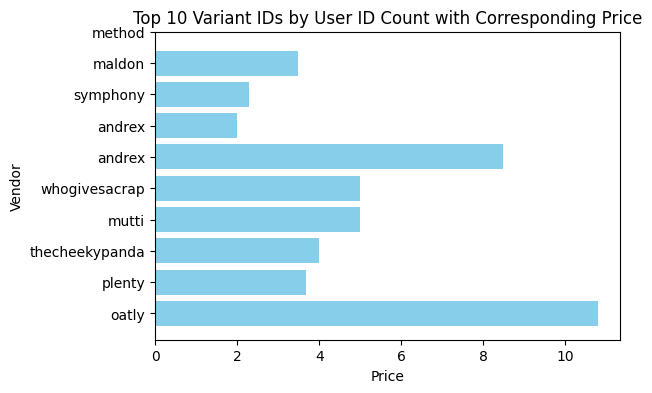

In [17]:

plt.figure(figsize=(6, 4))
plt.barh(df_inventory_merged_sorted['vendor'].head(10), df_inventory_merged_sorted['price'].head(10), color='skyblue')
plt.xlabel('Price')
plt.ylabel('Vendor')
plt.title('Top 10 Variant IDs by User ID Count with Corresponding Price')

plt.yticks(ticks=range(len(df_inventory_merged_sorted['vendor'].head(10))), labels=df_inventory_merged_sorted['vendor'].head(10))

plt.show()

# Second Analysis conducted - Usuarios de más valor

**Estudio de la frecuencia de pedidos por usuario:**

In [87]:
df_user_id_counts = df_orders.groupby('user_id')['id'].nunique().reset_index()
df_user_id_counts.rename(columns={'id': 'number_of_orders'}, inplace=True)
df_users_merged = pd.merge(df_users, df_user_id_counts, how='left', on='user_id')

df_users_merged['number_of_orders'] = df_users_merged['number_of_orders'].fillna(0).astype(int)

df_users_merged.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,number_of_orders
0,0e823a42e107461379e5b5613b7aa00537a72e1b0eaa7a...,Top Up,UKH,2021-05-08 13:33:49,2021-05-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
1,15768ced9bed648f745a7aa566a8895f7a73b9a47c1d4f...,Top Up,UKJ,2021-11-17 16:30:20,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
2,33e0cb6eacea0775e34adbaa2c1dec16b9d6484e6b9324...,Top Up,UKD,2022-03-09 23:12:25,2022-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1
3,57ca7591dc79825df0cecc4836a58e6062454555c86c35...,Top Up,UKI,2021-04-23 16:29:02,2021-04-01 00:00:00,NaN,NaN,NaN,NaN,NaN,10
4,085d8e598139ce6fc9f75d9de97960fa9e1457b409ec00...,Top Up,UKJ,2021-11-02 13:50:06,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1


In [114]:
print(df_users_merged['user_segment'].unique())

['Top Up' 'Proposition']


In [117]:
df_users_merged.groupby('user_segment').count()

,user_id,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,number_of_orders
user_segment,,,,,,,,,,
Proposition,2340,2315,2340,2340,193,193,193,193,193,2340
Top Up,2643,2617,2643,2643,132,132,132,132,132,2643


In [76]:
df_users_merged_counts = df_users_merged.groupby('number_of_orders').size().reset_index(name='counts')
df_users_merged_counts['percentage'] = (df_users_merged_counts['counts'] / df_users_merged_counts['counts'].sum()) * 100
df_users_merged_counts

,number_of_orders,counts,percentage
0,1,3572,71.683725
1,2,698,14.007626
2,3,251,5.037126
3,4,148,2.970098
4,5,89,1.786073
5,6,58,1.163957
6,7,46,0.923139
7,8,32,0.642183
8,9,23,0.461569
9,10,15,0.301023


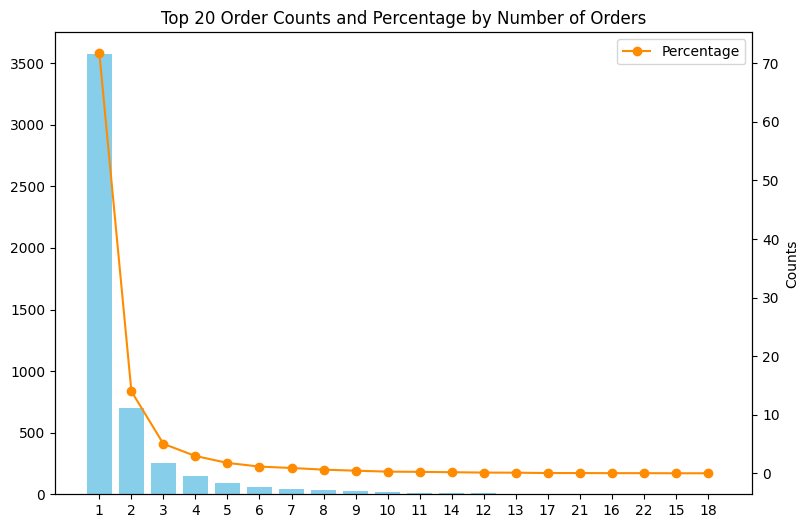

In [77]:
top20_df_users_merged_counts = df_users_merged_counts.sort_values(by='counts', ascending=False).head(20)

plt.figure(figsize=(9, 6))
plt.bar(top20_df_users_merged_counts['number_of_orders'].astype(str), top20_df_users_merged_counts['counts'], color='skyblue', label='Counts')

ax2 = plt.gca().twinx()
ax2.plot(top20_df_users_merged_counts['number_of_orders'].astype(str), top20_df_users_merged_counts['percentage'], color='darkorange', label='Percentage', marker='o', linestyle='-')
ax2.set_ylabel('Percentage (%)')

plt.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.title('Top 20 Order Counts and Percentage by Number of Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Counts')

plt.show()

**Ahora vamos a añadir el número de veces que un usuario ha añadido un producto a favoritos**

In [100]:
df_user_variant_counts = df_regulars.groupby('user_id')['variant_id'].nunique().reset_index()
df_user_variant_counts.rename(columns={'variant_id': 'variant_id_count'}, inplace=True)
df_users_merged2 = pd.merge(df_users_merged, df_user_variant_counts, how='left', on='user_id')

df_users_merged2['variant_id_count'] = df_users_merged2['variant_id_count'].fillna(0).astype(int)
df_users_merged2 = df_users_merged2.sort_values(by='variant_id_count', ascending=False)

df_users_merged2.head()

,user_id,user_segment,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,number_of_orders,variant_id_count
4033,9a4b53affbe91ca5fd0c97f6d86e8a59ae894f3c7a69a8...,Proposition,UKI,2021-11-16 09:46:26,2021-11-01 00:00:00,NaN,NaN,NaN,NaN,NaN,1,320
3796,9b5b3679033da9e1f3a4def18667e40a7763d0d3ec9d8f...,Proposition,UKK,2022-01-19 21:40:39,2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3,110
3708,11c967ad95d1e3a8f9767612e2f084aad75832cf019f8a...,Proposition,UKD,2021-01-06 08:52:51,2021-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,5,90
2098,af86901cbe9be971840f20e73e8af9d733f0887163f331...,Proposition,None,2021-03-10 10:09:10,2021-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN,3,88
3140,27c2c38327ba83867c6291ee6bd0c35548edd256ed51c9...,Proposition,UKL,2020-07-13 20:25:43,2020-07-01 00:00:00,2.0,2.0,0.0,0.0,0.0,9,85


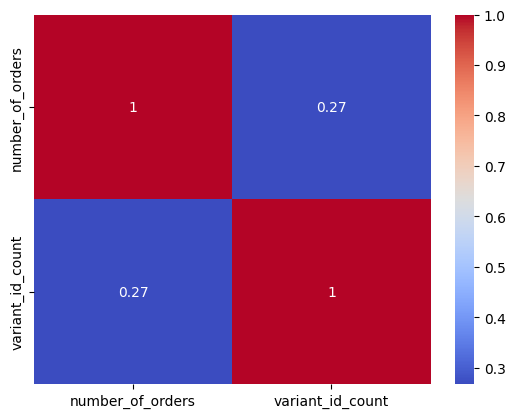

In [83]:
sns.heatmap(df_users_merged2[['number_of_orders', 'variant_id_count']].corr(), annot=True, cmap='coolwarm')
plt.show()

Hay una relación positiva entre estas dos variables, pero esta asociación no es lo suficientemente fuerte como para considerarla significativa.

**Estudio de la correlacion entre count_people, count_adults, count_children, count_babies, count_pets y el número de pedidos**

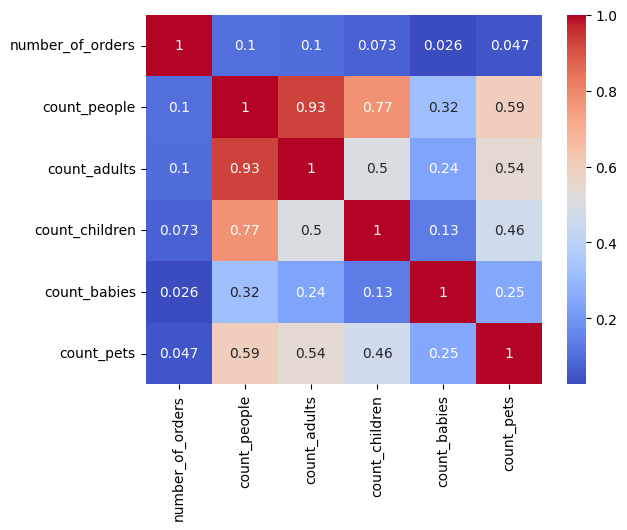

In [111]:
column_names = ['count_people', 'count_adults', 'count_children', 'count_babies', 'count_pets']

for column in column_names:
    df_users_merged2[column] = df_users_merged2[column].fillna(0).astype(int)

sns.heatmap(df_users_merged2[['number_of_orders', 'count_people', 'count_adults', 'count_children', 'count_babies', 'count_pets']].corr(), annot=True, cmap='coolwarm')
plt.show()

# Third - Creamos un dataset

Aunque se que vamos a perder algo de información al perder la trazabilidad de los productos que se han comprado juntos (lo cual creo que luego podemos añadir), para hacer un dataframe se me ocurre hacer un merge de los anteriores dos df que hemos usaod sobre variant_id y user_id con df_orders.

In [128]:
df_orders_expanded.dtypes

id                         int64
user_id                   object
created_at        datetime64[us]
order_date        datetime64[us]
user_order_seq             int64
ordered_items             object
dtype: object

In [136]:
df_orders_expanded = df_orders.explode('ordered_items')
df_orders_expanded.rename(columns={'ordered_items': 'variant_id'}, inplace=True)
df_orders_expanded = pd.merge(df_orders_expanded, df_inventory_merged, how='left', on='variant_id')
df_orders_expanded = pd.merge(df_orders_expanded, df_users_merged2, how='left', on='user_id')

df_orders_expanded

,id,user_id,created_at,order_date,user_order_seq,variant_id,price,compare_at_price,vendor,product_type,...,user_nuts1,first_ordered_at,customer_cohort_month,count_people,count_adults,count_children,count_babies,count_pets,number_of_orders,variant_id_count
0,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618849693828,NaN,NaN,NaN,NaN,...,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4,4,0,0,0,2,18
1,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618860179588,NaN,NaN,NaN,NaN,...,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4,4,0,0,0,2,18
2,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618874040452,NaN,NaN,NaN,NaN,...,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4,4,0,0,0,2,18
3,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,NaN,NaN,NaN,NaN,...,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4,4,0,0,0,2,18
4,2204073066628,62e271062eb827e411bd73941178d29b022f5f2de9d37f...,2020-04-30 14:32:19,2020-04-30,1,33618907005060,NaN,NaN,NaN,NaN,...,UKI,2020-04-30 14:32:19,2020-04-01 00:00:00,4,4,0,0,0,2,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107953,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,34537169453188,0.99,1.38,whiskas,cat-food,...,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,0,0,0,0,0,3,1
107954,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39368665432196,4.99,5.09,whiskas,cat-food,...,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,0,0,0,0,0,3,1
107955,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39403033428100,3.29,3.40,napolina,tins-packaged-foods,...,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,0,0,0,0,0,3,1
107956,4026732413060,faaad4bc113fe7e0a888a0d3535877d3c692f591882c25...,2022-03-14 00:24:59,2022-03-14,3,39459281272964,4.49,9.00,cif,cleaning-products,...,UKD,2022-01-02 00:39:26,2022-01-01 00:00:00,0,0,0,0,0,3,1


In [137]:
print(df_orders_expanded.isna().sum())
df_orders_expanded = df_orders_expanded.dropna(subset=['price'])

id                           0
user_id                      0
created_at                   0
order_date                   0
user_order_seq               0
variant_id                   0
price                    15597
compare_at_price         15597
vendor                   15597
product_type             15597
tags                     15597
user_id_count            15597
user_segment                 0
user_nuts1                 810
first_ordered_at             0
customer_cohort_month        0
count_people                 0
count_adults                 0
count_children               0
count_babies                 0
count_pets                   0
number_of_orders             0
variant_id_count             0
dtype: int64


In [138]:
def deep_view(df):
    for columna in df.columns:
        print(f"Análisis de la columna: {columna}")

        if pd.api.types.is_numeric_dtype(df[columna]):
            print("Tipo: Numérica")
            print(f"Media: {df[columna].mean()}")
        else:
            print("Tipo: Categórica/Texto")

        print(f"Número total de valores: {df[columna].size}")
        print(f"Número de valores nulos: {df[columna].isnull().sum()}")

        valores_unicos = df[columna].value_counts()
        print(f"Número de valores únicos: {len(valores_unicos)}")
        print("Frecuencias de los valores únicos:")
        print(valores_unicos)

        print("\n" + "-"*50 + "\n")

deep_view(df_orders_expanded)

Análisis de la columna: id
Tipo: Numérica
Media: 3701250306294.462
Número total de valores: 92361
Número de valores nulos: 0
Número de valores únicos: 8726
Frecuencias de los valores únicos:
id
3947934548100    113
3752334098564     62
3822639513732     59
3730902712452     56
4022169960580     54
                ... 
3645791895684      1
2897880449156      1
2899065110660      1
2899294486660      1
2892580257924      1
Name: count, Length: 8726, dtype: int64

--------------------------------------------------

Análisis de la columna: user_id
Tipo: Categórica/Texto
Número total de valores: 92361
Número de valores nulos: 0
Número de valores únicos: 4948
Frecuencias de los valores únicos:
user_id
a655b992a3ee5f6aa9f5ab5662c4befac1fdc45c99885b173618b661ca7381c383b1364e977c9f51366cdc62e4d92ff383e8e5aac7ea9a552059be2671de24e2    448
751784f6b91585570748d781931f56e3ca71fc92bca0346adf0b3deb1581600d647a44aa0d19b3e7cb09ee372fee8d133f5280c12474efa77c52719ed1d06b68    383
b9452236b95ed2b60d18404

## Insights

Popularidad de producto:
- Popularidad de producto por marca: Al pintar a los 20 vendors que tienen las variantes de producto más populares nos dimos cuenta de que marcas "bio" como oatly y plenty ocupaban las primeras posiciones por lo que es posible o bien que la tienda sea un herbolario donde todas las marcas son de esta tipología o que simplemente este tipo de marcas sean las preferidas por los consumidores.
Para verificar esta hipótesis pintamos el segundo gráfico donde aparecen las marcas más populares para los consumidores, sin embargo en este gráfico vemos que no solamente aparecen marcas "bio" sino otras grandes compañias como fairy o colgate. Deberíamos contrastar esta información con negocio.
- Popularidad de producto por precio: En este pestudio se ve que curiosamente el producto más añadido como favorito tiene un precio bastante elevado. Al tratarse de una marca de leche de avena este será probablemente un pack de 6 o algo por el estilo.


Usuarios de más valor:
- Frecuencia de pedidos por usuario: Empezas viendo que los usuarios parecen estar divididos en dos segmentos: 'Top Up' y 'Proposition', sin embargo el número total de pedidos de estos parece similar por lo que no parece tratarse de una división de valor de usuario (aunque habría que analizar el ticket medio de cada pedido). Cuando estudiamos la frecuencia de cada usuario vemos que el 71% solamente ha hecho 1 pedido lo que nos indica que no tenemos muchos compradores recurrentes o que no llevamos mucho tiempo recopilando datos.
- Relación entre número de artículos añadidos a favoritos y número de pedidos: Para validar la hipótesis de si un usuario activo (que añade con frecuencia artículos a favoritos) esta correlado con un alto número de pedidos estudiamos las correlaciones de ambas variables sin observar una relación fuerte entre ambas variables.
- Relación  entre las variables opcionales y el número de pedidos: Para ver si pudiera existir una correlación entre estos usuarios más proactivos a proporcionar esta información y el número de productos, volvemos a estudar la correlación entre variables sin observar fuertes relaciones.


Creación de un dataset
- Lo primero comentar que no se si esta ha sido la mejor forma de hacer el merge ya que estamos pendiendo la información que la composición de la compra del usuario. WIP: Ver como mejorar este error.
- En segundo lugar hay una serie de variantes que aparecen como NaN ya que probablemente sea recien añadidas y todavia no tengamos info de ellas o estén descatalogadas. Debido a esto las eliminaremos de nuestro dataframe. 
- WIP >> Seguir analizando 